In [348]:
import pandas as pd
from feature_engine.creation import CyclicalFeatures 
data = pd.read_csv('../../data//promice/preprocessed/daily/SCO_L.csv')
data = data.drop(['Unnamed: 0','Surface height from combined measurements'], axis=1)
#

In [349]:
data.index = pd.to_datetime(data['Datetime'], format='%Y-%m-%d')
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%Y-%m-%d')
#display(data)
print(data.info())
data['Ablation'].value_counts()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5309 entries, 2008-07-22 00:00:00+00:00 to 2023-02-02 00:00:00+00:00
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype              
---  ------                                           --------------  -----              
 0   stid                                             5309 non-null   object             
 1   Datetime                                         5309 non-null   datetime64[ns, UTC]
 2   Air pressure (upper boom)                        5266 non-null   float64            
 3   Air temperature (upper boom)                     5266 non-null   float64            
 4   Relative humidity (upper boom) - corrected       5266 non-null   float64            
 5   Specific humidity (upper boom)                   5266 non-null   float64            
 6   Wind speed (upper boom)                          4525 non-null   float64            
 7   Wind from direction (upper boo

False    3755
True     1554
Name: Ablation, dtype: int64

In [350]:
def add_features(data):
    df = data.copy()
    df['DayOfYear'] = df['Datetime'].dt.dayofyear
    df['WeekNum'] = df['Datetime'].dt.isocalendar().week.astype(int)
    df['Month'] = df['Datetime'].dt.month
    df['Year'] = df['Datetime'].dt.year
    return df
#df = add_features(data)

In [323]:
def add_features(data):
    df = data.copy()
    df['DayOfYear'] = df['Datetime'].dt.dayofyear
    df['WeekNum'] = df['Datetime'].dt.isocalendar().week.astype(int)
    df['Month'] = df['Datetime'].dt.month
    df['Year'] = df['Datetime'].dt.year
    return df
#df = add_features(data)

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.compose import make_column_transformer

def pre_process(df, show=False, cyclical = False):

    df = df.copy()
    cyclical_cols = ['WeekNum', 'Wind from direction (upper boom)']
    numerical_cols = [x for x in df.select_dtypes(include=['int64','float64']).columns.to_list() if x not in cyclical_cols]

    df = df.ffill().dropna()

    num_transformer = make_pipeline(
        SimpleImputer(strategy='mean'),
        MinMaxScaler())

    preprocessor = make_column_transformer(
    (num_transformer, numerical_cols)
    )

    df[numerical_cols] = preprocessor.fit_transform(df)

    if cyclical:
        cyclical = CyclicalFeatures(variables=cyclical_cols, max_values={'Month':12,'WeekNum':52,'DayOfYear':365,'Wind from direction (upper boom)':360},drop_original=True)
        cyclical_values = cyclical.fit_transform(df[cyclical_cols])
        df = df.drop(cyclical_cols,axis=1)

        df = df.merge(cyclical_values,how='left',left_index=True,right_index=True)
        cyclical_cols = cyclical_values.columns.to_list()
    
    if show and cyclical:
        df_year = cyclical_values[cyclical_values.index.year == 2019]
        plot_cols = cyclical_values.columns.to_list()[:-2]
    
        #plotting cyclical_conversion
        df_year[plot_cols].plot()
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.title(f'Data for year 2019')
        plt.show()
    return df
#df = add_features(data)
#df = pre_process(df, show=True, cyclical = True)

,stid,Datetime,Air pressure (upper boom),Air temperature (upper boom),Relative humidity (upper boom) - corrected,Specific humidity (upper boom),Wind speed (upper boom),Wind from direction (upper boom),Downwelling shortwave radiation - corrected,Upwelling shortwave radiation - corrected,...,train_Upwelling shortwave radiation - corrected,train_Downwelling longwave radiation,train_Upwelling longwave radiation,train_Surface temperature,train_Latent heat flux (upper boom),train_Sensible heat flux (upper boom),train_Surface height from combined measurements DELTA,train_Albedo,train_Cloud cover,train_DayOfYear
Datetime,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00+00:00,KAN_L,2009-01-01 00:00:00+00:00,937.027958,-5.015583,61.451458,1.638500,8.765417,146.503542,1.087375,0.791583,...,0.003531,0.440526,0.684802,0.766349,0.514867,0.631485,0.003,0.858007,0.113819,0.000000
2009-01-02 00:00:00+00:00,KAN_L,2009-01-02 00:00:00+00:00,935.885375,-1.239458,62.250375,2.291792,6.082417,138.751375,1.243583,0.903250,...,0.004029,0.553829,0.772801,0.845827,0.561428,0.556625,0.001,0.858007,0.185454,0.008333
2009-01-03 00:00:00+00:00,KAN_L,2009-01-03 00:00:00+00:00,936.626958,-4.406000,78.759250,2.203500,2.437125,120.458292,1.323875,0.959333,...,0.004279,0.590976,0.706004,0.780391,0.617767,0.290836,-0.006,0.858007,0.420024,0.016667
2009-01-04 00:00:00+00:00,KAN_L,2009-01-04 00:00:00+00:00,934.542417,-10.989875,96.157708,1.533792,1.432792,85.424542,1.032458,0.746417,...,0.003330,0.574446,0.581137,0.657417,0.617428,0.220976,-0.003,0.858007,0.675854,0.025000
2009-01-05 00:00:00+00:00,KAN_L,2009-01-05 00:00:00+00:00,930.521917,-6.603792,83.218750,1.964917,4.566542,114.406875,1.166542,0.841458,...,0.003754,0.544436,0.669780,0.746761,0.622452,0.395780,0.011,0.858007,0.416033,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-26 00:00:00+00:00,KAN_L,2022-04-26 00:00:00+00:00,941.375000,-0.723625,78.553458,2.998125,8.470083,135.716667,120.839000,92.655333,...,0.413321,0.846080,0.898495,0.950083,0.459729,0.340602,-0.009,0.606626,0.816688,0.958333
2022-04-27 00:00:00+00:00,KAN_L,2022-04-27 00:00:00+00:00,937.166667,1.272292,74.863750,3.336250,8.155958,134.741667,131.466625,96.606167,...,0.430945,0.840854,0.944310,0.985778,0.448460,0.407965,-0.008,0.525007,0.705433,0.966667
2022-04-28 00:00:00+00:00,KAN_L,2022-04-28 00:00:00+00:00,940.333333,1.216292,77.138750,3.410708,6.279042,138.937500,108.470000,79.078125,...,0.352755,0.846696,0.949766,0.991420,0.489165,0.339977,-0.002,0.519327,0.721734,0.975000


XGBoost Model MSE: 119.12229127163864
XGBoost Model R2: -0.7480954125634778
SVM Model MSE: 101.42187739994156
SVM Model R2: -0.48834543664141883
rf Model MSE: 141.57905235457068
rf Model R2: -1.077643817073171
Best Model: SVM
Optimized XGB Model results
[0]	validation_0-rmse:130.80849	validation_1-rmse:126.76896
[499]	validation_0-rmse:4.71714	validation_1-rmse:9.90097
Optimized xgb Model MSE: 98.02921594146521
Optimized xgb Model R2: -0.4385588193036156
MELT DAY
2009-05-20 00:00:00+00:00


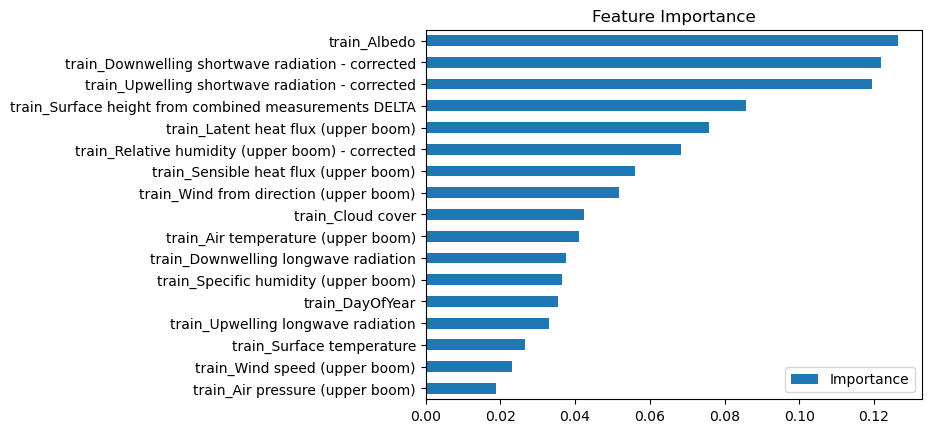

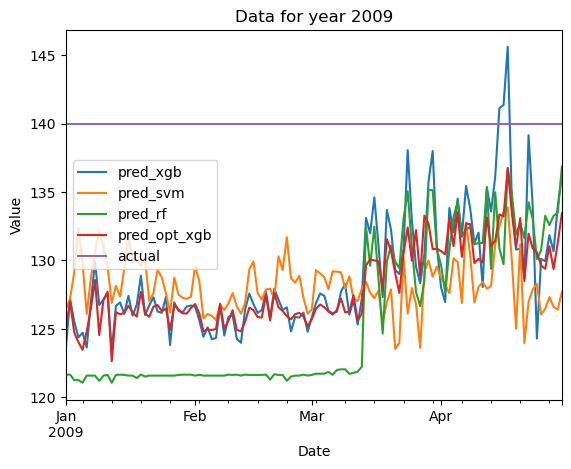

MELT DAY
2018-05-03 00:00:00+00:00


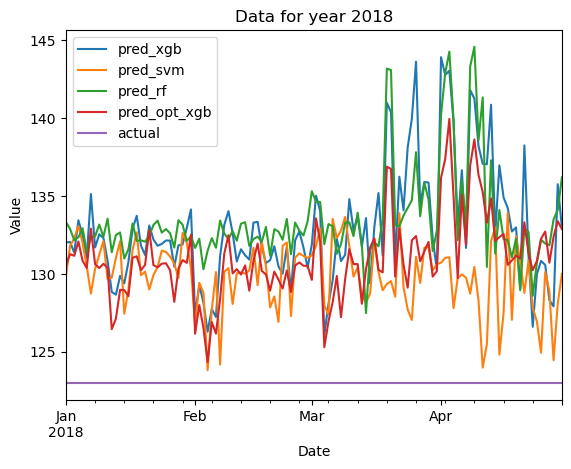

MELT DAY
2020-05-01 00:00:00+00:00


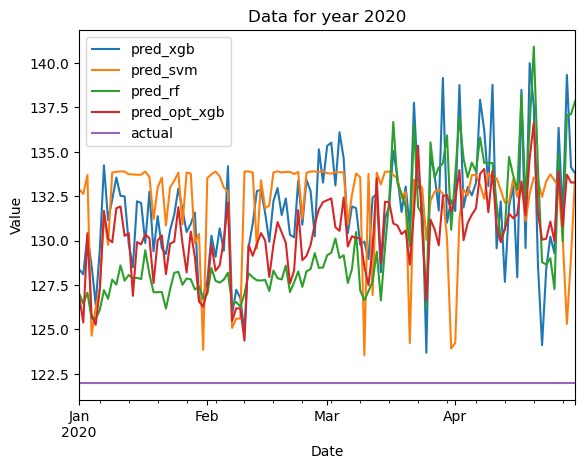

In [247]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

# Preprocessing 
data = add_features(data)
data = data.ffill()
df = data.copy()

# Define a function to determine if a given day meets the ice melt criteria
def is_melt_day(row):
    return row['Ablation'] == True


df['first_melt_day'] = df['DayOfYear'].copy()
#df['last_melt_day'] = df['DayOfYear'].copy()
# Iterate through each unique year in the dataset

max_year, min_year = df['Year'].max(), df['Year'].min()

df = df.loc[(df['Year'] != min_year) & (df['Year'] != max_year)]


unique_years = df['Year'].unique()
for year in unique_years:
    # Filter data for the current year
    year_data = df[df['Year'] == year]

    df.loc[df['Year'] == year,['first_melt_day']] = year_data.loc[year_data['Ablation'] == True]['DayOfYear'].min()
#    df.loc[df['Year'] == year,['last_melt_day']] = year_data.loc[year_data['Ablation'] == True]['DayOfYear'].max()

df = df.loc[(df['Month'] <= 4)]

train_columns = df.drop(['stid','Datetime','Ablation','Melting Season','WeekNum','Month','Year','first_melt_day'],axis=1).columns
train_data = pre_process(df[train_columns]).add_prefix('train_')
train_columns = train_data.columns
df = df.merge(train_data, how='left',left_index=True,right_index=True)
display(df)

target_columns = 'first_melt_day'

#-----------------------------------------------------------------------------
# Define a function to train and evaluate each model
def evaluate_model_mse(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test,predictions)
    return mse

def evaluate_model_r2(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    return r2

train_years, test_years = train_test_split(unique_years, test_size=0.2, random_state=42)

train = df.loc[df['Year'].isin(train_years)]
test = df.loc[df['Year'].isin(test_years)]

# Split the dataset into training and testing sets
X_train = train[train_columns].copy()
X_test = test[train_columns].copy()
y_train = train[target_columns].copy()
y_test = test[target_columns].copy()

# XGBoost model
xgb_model = XGBRegressor(n_estimators=500, max_depth=3, learning_rate=0.1)
xgb_mse = evaluate_model_mse(xgb_model, X_train, X_test, y_train, y_test)
xgb_r2 = evaluate_model_r2(xgb_model,X_train, X_test, y_train, y_test)
print(f"XGBoost Model MSE: {xgb_mse}")
print(f"XGBoost Model R2: {xgb_r2}")

# SVM model
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_mse = evaluate_model_mse(svm_model, X_train, X_test, y_train, y_test)
svm_r2 = evaluate_model_r2(svm_model, X_train, X_test, y_train, y_test)
print(f"SVM Model MSE: {svm_mse}")
print(f"SVM Model R2: {svm_r2}")

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_mse = evaluate_model_mse(rf_model, X_train, X_test, y_train, y_test)
rf_r2 = evaluate_model_r2(rf_model, X_train, X_test, y_train, y_test)
print(f"rf Model MSE: {rf_mse}")
print(f"rf Model R2: {rf_r2}")


# Choose the best model based on the lowest MSE
model_mse = {
    'XGBoost': xgb_mse,
    'SVM': svm_mse,
    'rf': rf_mse,
}

best_model_name = min(model_mse, key=model_mse.get)
best_model = {
    'XGBoost': xgb_model,
    'SVM': svm_model,
    'rf': rf_mse
}[best_model_name]

print(f"Best Model: {best_model_name}")

#---------------------------------------------------------------------------------------------------------
# Predict the beginning of the ice melt date for each year in the dataset

def xgb_grid(model, X_train, y_train):

    param_grid = {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
        'subsample': [0.5, 0.8, 1],
        'colsample_bytree': [0.5, 0.8, 1],
        'gamma': [0, 0.1, 1],
        'reg_alpha': [0, 0.1, 1],
        'reg_lambda': [1, 1.5, 2]
    }

    tscv = TimeSeriesSplit(n_splits=5)


    # Initialize the Random Forest Regressor and GridSearchCV
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, n_jobs=-1, verbose=2)

    # Fit the GridSearchCV model on the training data
    grid_search.fit(X_train, y_train)

    # Get the best parameters from the GridSearchCV
    best_params = grid_search.best_params_
    print("Best Parameters: ", best_params)
    return best_params

xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
#xgb_grid(xgb_regressor, X_train, y_train)
# -----------------------------------------------------------------------------------------------------------
opt_xgb_model = XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.8, 
    gamma=0, 
    learning_rate= 0.01,
    max_depth = 3, 
    n_estimators = 500, 
    reg_alpha = 0, 
    reg_lambda = 2, 
    subsample = 0.5,
    random_state = 42)

print('Optimized XGB Model results')


opt_xgb_model.fit(X_train, y_train, eval_set =[(X_train, y_train),(X_test, y_test)], verbose = 1000)
predictions = opt_xgb_model.predict(X_test)

opt_xgb_mse = mean_squared_error(y_test, predictions)
opt_xgb_r2 = r2_score(y_test, predictions)
print(f"Optimized xgb Model MSE: {opt_xgb_mse}")
print(f"Optimized xgb Model R2: {opt_xgb_r2}")

f1 = pd.DataFrame(data=opt_xgb_model.feature_importances_,
                  index = opt_xgb_model.feature_names_in_,
                  columns=['Importance'])
f1.sort_values('Importance').plot(kind='barh',title='Feature Importance')


melt_dates = {}

y_pred_xgb = xgb_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_opt_xgb = opt_xgb_model.predict(X_test)

results = pd.DataFrame()
results['actual'] = y_test.copy()
results.index = y_test.index
results['pred_xgb'] = y_pred_xgb
results['pred_svm'] = y_pred_svm
results['pred_rf'] = y_pred_rf
results['pred_opt_xgb'] = y_pred_opt_xgb


results['Year'] = y_test.index.year

unique_years = results['Year'].unique()

for year in unique_years:

    results_year = results.loc[results['Year'] == year]

    X_out = results_year[['pred_xgb','pred_svm','pred_rf','pred_opt_xgb','actual']]
    melt_day = data.loc[(data['Year'] == year) & (data['Ablation'] == True)].index.min()
    print('MELT DAY')
    print(melt_day)
    year_data.loc[year_data['Ablation'] == True]['DayOfYear'].min()
    

#plotting cyclical_conversion
    X_out.plot()
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.axvline(x=melt_day)
    plt.title(f'Data for year {year}')
    plt.show()



,stid,Datetime,Air pressure (upper boom),Air temperature (upper boom),Relative humidity (upper boom) - corrected,Specific humidity (upper boom),Wind speed (upper boom),Wind from direction (upper boom),Downwelling shortwave radiation - corrected,Upwelling shortwave radiation - corrected,...,train_Upwelling shortwave radiation - corrected,train_Downwelling longwave radiation,train_Upwelling longwave radiation,train_Surface temperature,train_Latent heat flux (upper boom),train_Sensible heat flux (upper boom),train_Surface height from combined measurements DELTA,train_Albedo,train_Cloud cover,train_DayOfYear
Datetime,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00+00:00,KAN_L,2009-01-01 00:00:00+00:00,937.027958,-5.015583,61.451458,1.638500,8.765417,146.503542,1.087375,0.791583,...,0.002725,0.403800,0.662246,0.766349,0.414286,0.435233,0.003,0.831791,0.119583,0.000000
2009-01-02 00:00:00+00:00,KAN_L,2009-01-02 00:00:00+00:00,935.885375,-1.239458,62.250375,2.291792,6.082417,138.751375,1.243583,0.903250,...,0.003110,0.507658,0.747348,0.845827,0.447110,0.383638,0.001,0.831791,0.190625,0.002740
2009-01-03 00:00:00+00:00,KAN_L,2009-01-03 00:00:00+00:00,936.626958,-4.406000,78.759250,2.203500,2.437125,120.458292,1.323875,0.959333,...,0.003303,0.541708,0.682750,0.780391,0.486827,0.200451,-0.006,0.831791,0.423250,0.005479
2009-01-04 00:00:00+00:00,KAN_L,2009-01-04 00:00:00+00:00,934.542417,-10.989875,96.157708,1.533792,1.432792,85.424542,1.032458,0.746417,...,0.002570,0.526556,0.561996,0.657417,0.486588,0.152301,-0.003,0.831791,0.676958,0.008219
2009-01-05 00:00:00+00:00,KAN_L,2009-01-05 00:00:00+00:00,930.521917,-6.603792,83.218750,1.964917,4.566542,114.406875,1.166542,0.841458,...,0.002897,0.499048,0.647719,0.746761,0.490130,0.272780,0.011,0.831791,0.419292,0.010959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27 00:00:00+00:00,KAN_L,2022-12-27 00:00:00+00:00,930.000000,-18.280000,53.282000,0.433000,5.951000,103.100000,0.000000,0.000000,...,0.000000,0.195256,0.352949,0.442776,0.454874,0.304333,0.024,0.239697,0.160000,0.986301
2022-12-28 00:00:00+00:00,KAN_L,2022-12-28 00:00:00+00:00,925.000000,-18.850000,75.954000,0.588000,8.820000,108.900000,0.000000,0.000000,...,0.000000,0.166971,0.353452,0.444830,0.474914,0.331914,-0.014,0.239697,0.111000,0.989041
2022-12-29 00:00:00+00:00,KAN_L,2022-12-29 00:00:00+00:00,929.000000,-15.440000,82.193000,0.873000,5.202000,108.100000,0.000000,0.000000,...,0.000000,0.281804,0.425812,0.521435,0.490437,0.274010,0.003,0.239697,0.265000,0.991781


XGBoost Model MSE: 0.0028492845434868897
XGBoost Model R2: -0.043795724973817896
SVM Model MSE: 0.012093291083847688
SVM Model R2: -3.4302088266469015
rf Model MSE: 0.002847901459854014
rf Model R2: -0.04328905154010387
Best Model: rf
Optimized XGB Model results
[0]	validation_0-rmse:0.49505	validation_1-rmse:0.49505
[499]	validation_0-rmse:0.03503	validation_1-rmse:0.05284
Optimized xgb Model MSE: 0.0027917802061578276
Optimized xgb Model R2: -0.02272981156452647
MELT DAY
2009-05-20 00:00:00+00:00


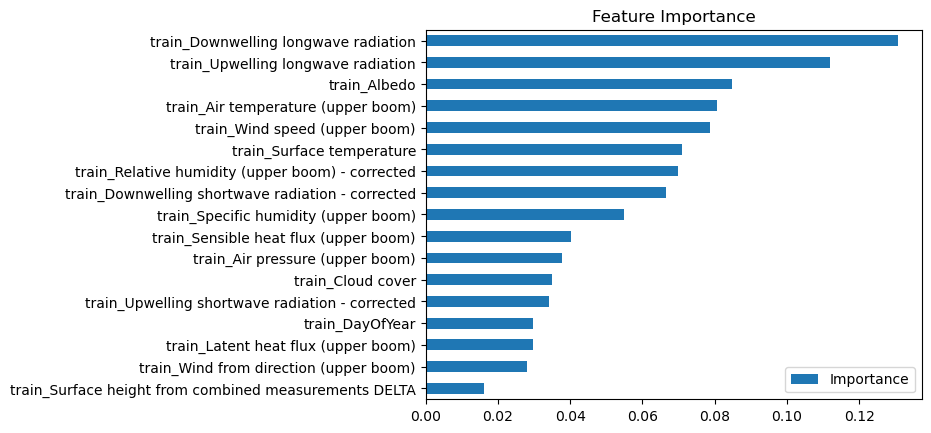

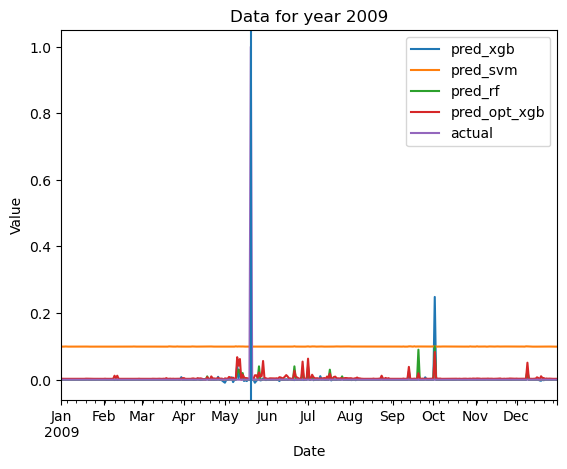

MELT DAY
2018-05-03 00:00:00+00:00


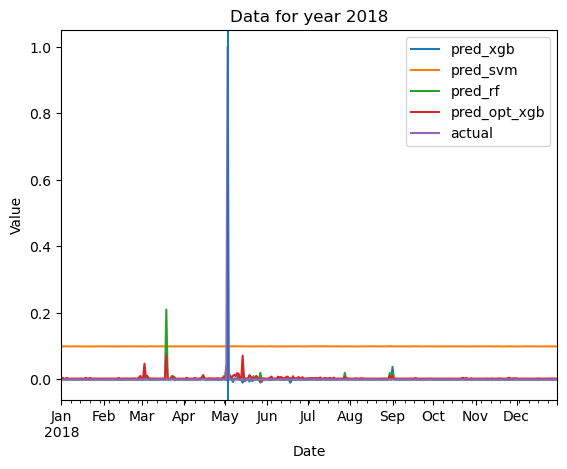

MELT DAY
2020-05-01 00:00:00+00:00


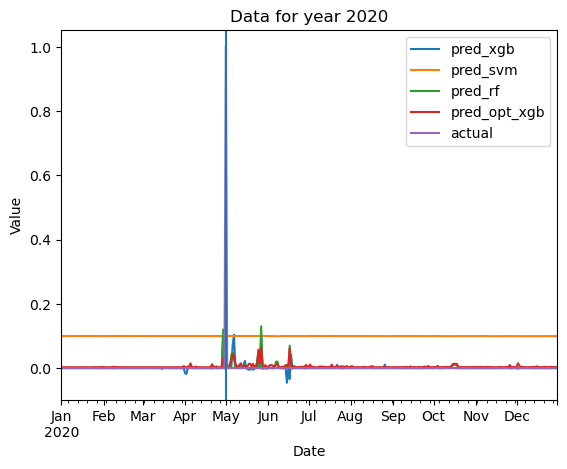

In [243]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

# Preprocessing 
data = add_features(data)
data = data.ffill()
df = data.copy()

# Define a function to determine if a given day meets the ice melt criteria
def is_melt_day(row):
    return row['Ablation'] == True


df['first_melt_day'] = df['DayOfYear'].copy()
#df['last_melt_day'] = df['DayOfYear'].copy()
# Iterate through each unique year in the dataset

max_year, min_year = df['Year'].max(), df['Year'].min()

df = df.loc[(df['Year'] != min_year) & (df['Year'] != max_year)]


unique_years = df['Year'].unique()
for year in unique_years:
    # Filter data for the current year
    year_data = df[df['Year'] == year]

    df.loc[df['Year'] == year,['first_melt_day']] = year_data.loc[year_data['Ablation'] == True]['DayOfYear'].min()
    df['first_melt_day_bool'] = np.where(df['first_melt_day'] == df['DayOfYear'], 1, 0)
#    df.loc[df['Year'] == year,['last_melt_day']] = year_data.loc[year_data['Ablation'] == True]['DayOfYear'].max()

#df = df.loc[(df['Month'] <= 4)]

train_columns = df.drop(['stid','Datetime','Ablation','Melting Season','WeekNum','Month','Year','first_melt_day','first_melt_day_bool'],axis=1).columns
train_data = pre_process(df[train_columns]).add_prefix('train_')
train_columns = train_data.columns
df = df.merge(train_data, how='left',left_index=True,right_index=True)
display(df)

target_columns = 'first_melt_day_bool'

#-----------------------------------------------------------------------------
# Define a function to train and evaluate each model
def evaluate_model_mse(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test,predictions)
    return mse

def evaluate_model_r2(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    return r2

train_years, test_years = train_test_split(unique_years, test_size=0.2, random_state=42)

train = df.loc[df['Year'].isin(train_years)]
test = df.loc[df['Year'].isin(test_years)]

# Split the dataset into training and testing sets
X_train = train[train_columns].copy()
X_test = test[train_columns].copy()
y_train = train[target_columns].copy()
y_test = test[target_columns].copy()

# XGBoost model
xgb_model = XGBRegressor(n_estimators=500, max_depth=3, learning_rate=0.1)
xgb_mse = evaluate_model_mse(xgb_model, X_train, X_test, y_train, y_test)
xgb_r2 = evaluate_model_r2(xgb_model,X_train, X_test, y_train, y_test)
print(f"XGBoost Model MSE: {xgb_mse}")
print(f"XGBoost Model R2: {xgb_r2}")

# SVM model
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_mse = evaluate_model_mse(svm_model, X_train, X_test, y_train, y_test)
svm_r2 = evaluate_model_r2(svm_model, X_train, X_test, y_train, y_test)
print(f"SVM Model MSE: {svm_mse}")
print(f"SVM Model R2: {svm_r2}")

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_mse = evaluate_model_mse(rf_model, X_train, X_test, y_train, y_test)
rf_r2 = evaluate_model_r2(rf_model, X_train, X_test, y_train, y_test)
print(f"rf Model MSE: {rf_mse}")
print(f"rf Model R2: {rf_r2}")


# Choose the best model based on the lowest MSE
model_mse = {
    'XGBoost': xgb_mse,
    'SVM': svm_mse,
    'rf': rf_mse,
}

best_model_name = min(model_mse, key=model_mse.get)
best_model = {
    'XGBoost': xgb_model,
    'SVM': svm_model,
    'rf': rf_mse
}[best_model_name]

print(f"Best Model: {best_model_name}")

#---------------------------------------------------------------------------------------------------------
# Predict the beginning of the ice melt date for each year in the dataset

def xgb_grid(model, X_train, y_train):

    param_grid = {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
        'subsample': [0.5, 0.8, 1],
        'colsample_bytree': [0.5, 0.8, 1],
        'gamma': [0, 0.1, 1],
        'reg_alpha': [0, 0.1, 1],
        'reg_lambda': [1, 1.5, 2]
    }

    tscv = TimeSeriesSplit(n_splits=5)


    # Initialize the Random Forest Regressor and GridSearchCV
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, n_jobs=-1, verbose=2)

    # Fit the GridSearchCV model on the training data
    grid_search.fit(X_train, y_train)

    # Get the best parameters from the GridSearchCV
    best_params = grid_search.best_params_
    print("Best Parameters: ", best_params)
    return best_params

xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
#xgb_grid(xgb_regressor, X_train, y_train)
# -----------------------------------------------------------------------------------------------------------
opt_xgb_model = XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.8, 
    gamma=0, 
    learning_rate= 0.01,
    max_depth = 3, 
    n_estimators = 500, 
    reg_alpha = 0, 
    reg_lambda = 2, 
    subsample = 0.5,
    random_state = 42)

print('Optimized XGB Model results')


opt_xgb_model.fit(X_train, y_train, eval_set =[(X_train, y_train),(X_test, y_test)], verbose = 1000)
predictions = opt_xgb_model.predict(X_test)

opt_xgb_mse = mean_squared_error(y_test, predictions)
opt_xgb_r2 = r2_score(y_test, predictions)
print(f"Optimized xgb Model MSE: {opt_xgb_mse}")
print(f"Optimized xgb Model R2: {opt_xgb_r2}")

f1 = pd.DataFrame(data=opt_xgb_model.feature_importances_,
                  index = opt_xgb_model.feature_names_in_,
                  columns=['Importance'])
f1.sort_values('Importance').plot(kind='barh',title='Feature Importance')


melt_dates = {}

y_pred_xgb = xgb_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_opt_xgb = opt_xgb_model.predict(X_test)

results = pd.DataFrame()
results['actual'] = y_test.copy()
results.index = y_test.index
results['pred_xgb'] = y_pred_xgb
results['pred_svm'] = y_pred_svm
results['pred_rf'] = y_pred_rf
results['pred_opt_xgb'] = y_pred_opt_xgb


results['Year'] = y_test.index.year

unique_years = results['Year'].unique()

for year in unique_years:

    results_year = results.loc[results['Year'] == year]

    X_out = results_year[['pred_xgb','pred_svm','pred_rf','pred_opt_xgb','actual']]
    melt_day = data.loc[(data['Year'] == year) & (data['Ablation'] == True)].index.min()
    print('MELT DAY')
    print(melt_day)
    year_data.loc[year_data['Ablation'] == True]['DayOfYear'].min()
    

#plotting cyclical_conversion
    X_out.plot()
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.axvline(x=melt_day)
    plt.title(f'Data for year {year}')
    plt.show()



XGBoost Model MSE: 0.0028492845434868897
XGBoost Model R2: -0.043795724973817896
Best Model: XGBoost


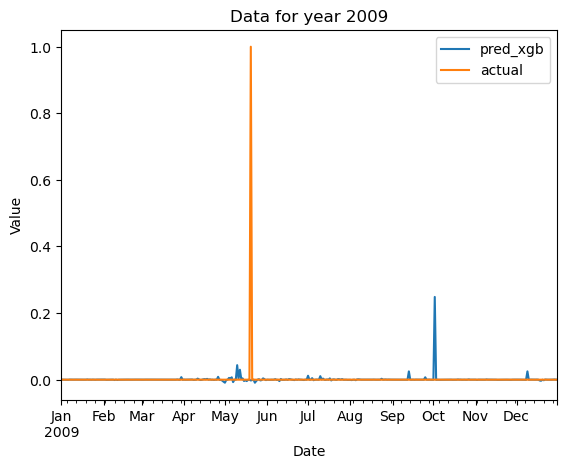

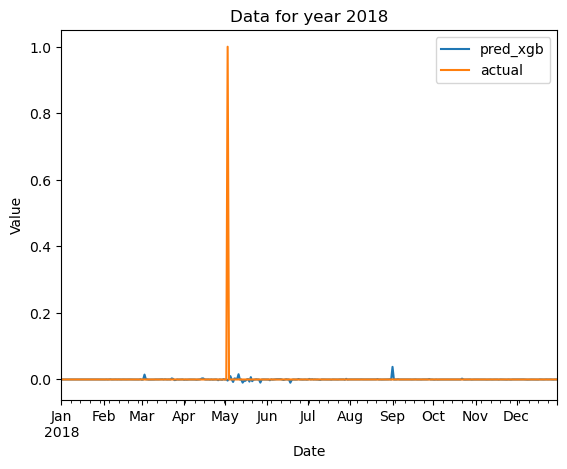

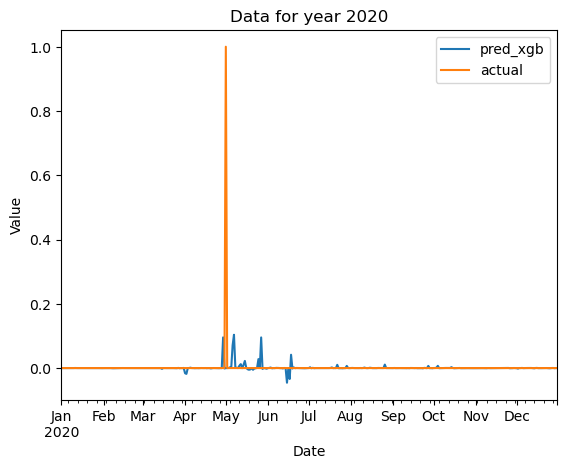

In [245]:
# Split the dataset into training and testing sets
X_train = train[train_columns].copy()
X_test = test[train_columns].copy()
y_train = train[target_columns].copy()
y_test = test[target_columns].copy()

# XGBoost model
xgb_model = XGBRegressor(n_estimators=500, max_depth=3, learning_rate=0.1)
xgb_mse = evaluate_model_mse(xgb_model, X_train, X_test, y_train, y_test)
xgb_r2 = evaluate_model_r2(xgb_model,X_train, X_test, y_train, y_test)
print(f"XGBoost Model MSE: {xgb_mse}")
print(f"XGBoost Model R2: {xgb_r2}")

# Choose the best model based on the lowest MSE
model_mse = {
    'XGBoost': xgb_mse,
}

best_model_name = min(model_mse, key=model_mse.get)
best_model = {
    'XGBoost': xgb_model,
}[best_model_name]

print(f"Best Model: {best_model_name}")

# Predict the beginning of the ice melt date for each year in the dataset

melt_dates = {}

y_pred_xgb = xgb_model.predict(X_test)

results = pd.DataFrame()
results['actual'] = y_test.copy()
results.index = y_test.index
results['pred_xgb'] = y_pred_xgb

results['Year'] = y_test.index.year

unique_years = results['Year'].unique()

for year in unique_years:

    results_year = results.loc[results['Year'] == year]

    X_out = results_year[['pred_xgb','actual']]
    melt_day = data.loc[(data['Year'] == year) & (data['Ablation'] == True)].index.min()

    #plotting cyclical_conversion
    X_out.plot()
    plt.xlabel('Date')
    plt.ylabel('Value')
    #plt.axvline(x=melt_day)
    plt.title(f'Data for year {year}')
    plt.show()

    


In [257]:
print(data.head(2).to_dict())

{'stid': {Timestamp('2008-09-01 00:00:00+0000', tz='UTC'): 'KAN_L', Timestamp('2008-09-02 00:00:00+0000', tz='UTC'): 'KAN_L'}, 'Datetime': {Timestamp('2008-09-01 00:00:00+0000', tz='UTC'): Timestamp('2008-09-01 00:00:00+0000', tz='UTC'), Timestamp('2008-09-02 00:00:00+0000', tz='UTC'): Timestamp('2008-09-02 00:00:00+0000', tz='UTC')}, 'Air pressure (upper boom)': {Timestamp('2008-09-01 00:00:00+0000', tz='UTC'): nan, Timestamp('2008-09-02 00:00:00+0000', tz='UTC'): 930.2724166666668}, 'Air temperature (upper boom)': {Timestamp('2008-09-01 00:00:00+0000', tz='UTC'): nan, Timestamp('2008-09-02 00:00:00+0000', tz='UTC'): 4.067041666666667}, 'Relative humidity (upper boom) - corrected': {Timestamp('2008-09-01 00:00:00+0000', tz='UTC'): nan, Timestamp('2008-09-02 00:00:00+0000', tz='UTC'): 80.71675}, 'Specific humidity (upper boom)': {Timestamp('2008-09-01 00:00:00+0000', tz='UTC'): nan, Timestamp('2008-09-02 00:00:00+0000', tz='UTC'): 4.420708333333334}, 'Wind speed (upper boom)': {Timesta

In [335]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb

# Preprocessing 
data = add_features(data)
data = data.ffill()
df = data.copy()

max_year, min_year = df['Year'].max(), df['Year'].min()
df = df.loc[(df['Year'] != min_year) & (df['Year'] != max_year)]

df['event'] = 0
df['time_to_event'] = 0

# event categorization
unique_years = df['Year'].unique()
events = []
negative_time = list(range(-365,0))

positive_time = list(range(0,365))
for year in unique_years:
    # Filter data for the current year
    year_data = df[df['Year'] == year]
    event = year_data.loc[year_data['Ablation'] == True].index.min()

    df.loc[df.index == event,['event']] = 1
    df.loc[df.index.year == year, ['time_to_event']] = (year_data.index - event).astype('timedelta64[D]')


exclude_list =  ['stid','Datetime','Ablation','Melting Season','WeekNum','Month','Year','event','time_to_event','Surface height from combined measurements DELTA']

train_columns = df[[column for column in df.columns if column not in exclude_list]].columns


train_data = pre_process(df[train_columns])
train_columns = train_data.columns

target_columns = ['event','time_to_event']
print(train_columns)

Index(['Air pressure (upper boom)', 'Air temperature (upper boom)',
       'Relative humidity (upper boom) - corrected',
       'Specific humidity (upper boom)', 'Wind speed (upper boom)',
       'Wind from direction (upper boom)',
       'Downwelling shortwave radiation - corrected',
       'Upwelling shortwave radiation - corrected',
       'Downwelling longwave radiation', 'Upwelling longwave radiation',
       'Surface temperature', 'Latent heat flux (upper boom)',
       'Sensible heat flux (upper boom)', 'Albedo', 'Cloud cover',
       'DayOfYear'],
      dtype='object')


In [342]:
# Split the data into features (X) and target (y)
X = train_data
y = df[target_columns]


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state= 42)

def cox_pho_loss(y_true, y_pred):
    event, time_to_event = y_true[:, 0], y_true[:, 1]
    risk_set = np.zeros_like(time_to_event)
    
    for idx, time in enumerate(time_to_event):
        risk_set[idx] = np.sum(time_to_event >= time)
        
    exp_pred = np.exp(y_pred)
    log_partial_sum = np.log(np.sum(exp_pred[risk_set == 1]))
   
    loss = (y_pred * event) - (log_partial_sum * event)
    return -np.sum(loss) / len(event)

def cox_pho_loss_grad(y_true, y_pred):
    event, time_to_event = y_true[:, 0], y_true[:, 1]
    risk_set = np.zeros_like(time_to_event)
    
    for idx, time in enumerate(time_to_event):
        risk_set[idx] = np.sum(time_to_event >= time)
    
    exp_pred = np.exp(y_pred)
    partial_sum = np.sum(exp_pred[risk_set == 1])
    
    grad = event - (exp_pred * event) / partial_sum
    return -grad

def custom_asymmetric_objective(y_true, y_pred):
    grad = cox_pho_loss_grad(y_true, y_pred)
    hess = np.ones_like(grad)  # Using a constant Hessian for simplicity
    return grad, hess


In [347]:
# Split the data into features (X) and target (y)
X = train_data
y = df[target_columns]


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state= 42)

# ----------------------------------------------------------------------

def custom_asymmetric_objective(y_true, y_pred, event):
    risk_set = np.zeroes_like(y_true)

    for idx, time in enumerate(y_true):
        risk_set[idx] = np.sum(y_true >= time)

    exp_pred = np.exp(y_pred)
    log_partial_sum = np.log(np.sum(exp_pred[risk_set == 1]))
    loss = (y_pred * event) - (log_partial_sum * event)

    return -np.sum(loss) / len(event) 

def custom_assymetric_objective_grad(y_true, y_pred, event):
    risk_set = np.zeroes_like(y_true)

    for idx, time in enumerate(y_true):
        risk_set[idx] = np.sum(y_true >= time)

    exp_pred = np.exp(y_pred)
    partial_sum = np.sum(exp_pred[risk_set == 1])

    grad = event - (exp_pred * event) / partial_sum

    return -grad 



# Convert your data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train['time_to_event'])
dval = xgb.DMatrix(X_val, label=y_val['time_to_event'])

# Set up XGBoost parameters
params = {
    'learning_rate': 0.01,  
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 1,
    'obj': custom_asymmetric_objective,
    'disable_default_eval_metric': 1,  # Disable default evaluation metric since it is not applicable
}

# Train the model
# watchlist = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(params, dtrain, num_boost_round=1000, evals=watchlist, early_stopping_rounds=50, verbose_eval=True)



[05:18:34] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "obj" } are not used.



XGBoostError: [05:18:34] c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:52: Check failed: info.labels.Size() == preds.Size() (4090 vs. 8180) : Invalid shape of labels.

In [ ]:
# Split the data into features (X) and target (y)
X = train_data
y = df[target_columns]


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state= 42)

